In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [ ]:
from google.colab import files
seoul_electric_vehicle = files.upload()

Saving Charging_capacity_of_electric_vehicle_charging_stations_owned_by_Seoul_Metropolitan_Government.csv to Charging_capacity_of_electric_vehicle_charging_stations_owned_by_Seoul_Metropolitan_Government (2).csv


In [ ]:
import io
seoul_electric_vehicle = pd.read_csv(io.StringIO(seoul_electric_vehicle['Charging_capacity_of_electric_vehicle_charging_stations_owned_by_Seoul_Metropolitan_Government.csv'].decode('cp949')), header = 0, engine = 'python')

In [ ]:
seoul_electric_vehicle.head()

,순번,충전구분,충전소명,주소,충전기 최대 용량,충전량,충전시간,날짜,충전시작시간,충전종료시간
0,1,완속,서울시 본관청사,중구 세종대로 110,7,0.000,2,2022-01-19,14:09,14:10
1,2,급속,양재솔라스테이션,서초구 양재동 201-1,100,4.116,17,2022-01-19,13:54,14:10
2,3,급속,서울시 본관청사,중구 세종대로 110,100,2.320,16,2022-01-19,13:53,14:08
3,4,급속,동작구청,동작구 장승배기로 161,50,8.298,19,2022-01-19,13:51,14:10
4,5,급속,서울시 본관청사,중구 세종대로 110,100,12.760,23,2022-01-19,13:47,14:10


In [ ]:
seoul_electric_vehicle_Standard = seoul_electric_vehicle[seoul_electric_vehicle['충전구분'] == '완속']
seoul_electric_vehicle_Standard.head()

,순번,충전구분,충전소명,주소,충전기 최대 용량,충전량,충전시간,날짜,충전시작시간,충전종료시간
0,1,완속,서울시 본관청사,중구 세종대로 110,7,0.000,2,2022-01-19,14:09,14:10
9,10,완속,송월동차고지,종로구 송월길 52,7,0.577,28,2022-01-19,13:41,14:08
10,11,완속,서울시 본관청사,중구 세종대로 110,7,2.006,21,2022-01-19,13:40,14:00
19,20,완속,송월동차고지,종로구 송월길 52,7,1.907,49,2022-01-19,13:12,14:01
35,36,완속,서울시 본관청사,중구 세종대로 110,7,4.850,47,2022-01-19,12:07,12:53


In [ ]:
seoul_electric_vehicle_Quick = seoul_electric_vehicle[seoul_electric_vehicle['충전구분'] == '급속']
seoul_electric_vehicle_Quick.head()

,순번,충전구분,충전소명,주소,충전기 최대 용량,충전량,충전시간,날짜,충전시작시간,충전종료시간
1,2,급속,양재솔라스테이션,서초구 양재동 201-1,100,4.116,17,2022-01-19,13:54,14:10
2,3,급속,서울시 본관청사,중구 세종대로 110,100,2.320,16,2022-01-19,13:53,14:08
3,4,급속,동작구청,동작구 장승배기로 161,50,8.298,19,2022-01-19,13:51,14:10
4,5,급속,서울시 본관청사,중구 세종대로 110,100,12.760,23,2022-01-19,13:47,14:10
5,6,급속,중랑구청,중랑구 신내동 662,100,4.310,16,2022-01-19,13:47,14:02


In [ ]:
X = seoul_electric_vehicle_Standard['충전량']
Y = seoul_electric_vehicle_Quick['충전시간']
X.head()
Y.head()

1    17
2    16
3    19
4    23
5    16
Name: 충전시간, dtype: int64

In [ ]:
X_ = (X - X.mean()) / X.std() #표준화

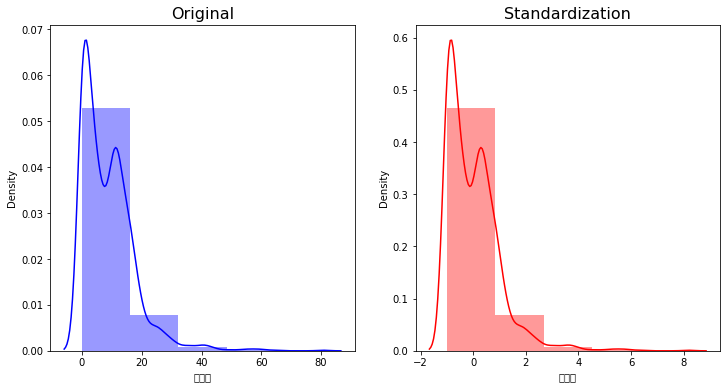

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Standardization', fontsize=16)
plt.show()